# Discrete cosine transform

In [6]:
import numpy as np
import scipy.fft as fft
import scipy.fftpack as fftpack


def dct_fftpack(a):
    return fftpack.dctn(a, norm='ortho')


def dct_fft(a):
    return fft.dctn(a, norm='ortho')


def idct_fftpack(a):
    return fftpack.idctn(a, norm='ortho')


def idct_fft(a):
    return fft.idctn(a, norm='ortho')

In [7]:
import skimage.data

camera = skimage.data.camera()
camera = skimage.util.img_as_float(camera)

assert np.allclose(idct_fftpack(dct_fftpack(camera)), camera)
assert np.allclose(idct_fft(dct_fft(camera)), camera)
assert np.allclose(dct_fftpack(camera), dct_fft(camera))
assert np.allclose(idct_fftpack(camera), idct_fft(camera))

Output()

(5.264999999999999e-06, 0.002216032999999999)


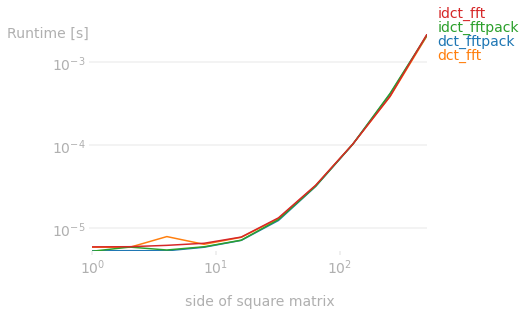

In [8]:
import perfplot

rng = np.random.default_rng(seed=0)

perfplot.show(
    setup=lambda n: rng.standard_normal((n, n)),
    kernels=[dct_fftpack, dct_fft, idct_fftpack, idct_fft],
    n_range=[2 ** k for k in range(10)],
    equality_check=None,
    xlabel='side of square matrix',
)